# Customer Response Predict Model

The purpose of this notebook is to create the data cleaning process and the customer response predicting model.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

## Read-in Raw Data

In [2]:
# load in the data
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(mailout_train.shape)
print(mailout_test.shape)

(42962, 367)
(42833, 366)


## Data Exploration

In [4]:
mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [5]:
mailout_train.dtypes

LNR                             int64
AGER_TYP                        int64
AKT_DAT_KL                    float64
ALTER_HH                      float64
ALTER_KIND1                   float64
ALTER_KIND2                   float64
ALTER_KIND3                   float64
ALTER_KIND4                   float64
ALTERSKATEGORIE_FEIN          float64
ANZ_HAUSHALTE_AKTIV           float64
ANZ_HH_TITEL                  float64
ANZ_KINDER                    float64
ANZ_PERSONEN                  float64
ANZ_STATISTISCHE_HAUSHALTE    float64
ANZ_TITEL                     float64
ARBEIT                        float64
BALLRAUM                      float64
CAMEO_DEU_2015                 object
CAMEO_DEUG_2015                object
CAMEO_INTL_2015                object
CJT_GESAMTTYP                 float64
CJT_KATALOGNUTZER             float64
CJT_TYP_1                     float64
CJT_TYP_2                     float64
CJT_TYP_3                     float64
CJT_TYP_4                     float64
CJT_TYP_5   

In [6]:
# Calculate correlations between numeric features
correlations = mailout_train.corr()
correlations

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,1.000000,0.005433,0.005163,0.004099,0.018600,-0.042450,0.028232,0.013178,0.002403,-0.015307,...,-0.008683,-0.010053,-0.008554,-0.003045,-0.008405,-0.002324,-0.009512,-0.002906,0.000740,0.009844
AGER_TYP,0.005433,1.000000,-0.071754,-0.032178,-0.046069,-0.061731,-0.016509,0.058241,-0.010443,0.048102,...,-0.025772,-0.097238,-0.156353,0.239601,0.028656,-0.050334,-0.047957,0.013432,-0.000515,0.403117
AKT_DAT_KL,0.005163,-0.071754,1.000000,-0.027127,-0.041947,-0.082154,-0.070953,0.074055,0.026721,0.060838,...,0.066541,0.075274,0.074538,-0.003773,-0.267657,-0.009333,0.058702,-0.015069,0.038450,-0.044648
ALTER_HH,0.004099,-0.032178,-0.027127,1.000000,0.003680,0.025367,-0.017609,0.033465,0.457192,-0.090474,...,-0.303914,-0.236518,-0.158338,-0.397362,0.007447,0.069985,-0.080274,-0.014454,-0.038116,-0.161228
ALTER_KIND1,0.018600,-0.046069,-0.041947,0.003680,1.000000,0.809708,0.636420,0.510508,-0.078082,0.038627,...,0.003007,-0.032993,-0.055549,NaN,0.080228,-0.050265,-0.112421,0.011625,-0.008222,0.078149
ALTER_KIND2,-0.042450,-0.061731,-0.082154,0.025367,0.809708,1.000000,0.740516,0.701822,-0.045360,0.014397,...,0.007501,0.024819,0.010560,NaN,0.064561,-0.025074,0.034542,-0.022034,0.064517,-0.009753
ALTER_KIND3,0.028232,-0.016509,-0.070953,-0.017609,0.636420,0.740516,1.000000,0.860868,-0.151178,0.042619,...,0.001817,0.013691,0.029065,NaN,-0.032811,-0.029771,-0.173679,0.020283,0.073014,0.076375
ALTER_KIND4,0.013178,0.058241,0.074055,0.033465,0.510508,0.701822,0.860868,1.000000,-0.169085,-0.053813,...,-0.172362,-0.090854,0.008889,NaN,0.063036,-0.096718,-0.218541,-0.221271,0.318942,0.021330
ALTERSKATEGORIE_FEIN,0.002403,-0.010443,0.026721,0.457192,-0.078082,-0.045360,-0.151178,-0.169085,1.000000,-0.055813,...,-0.270449,-0.178516,-0.105348,-0.367147,-0.073629,0.048716,-0.014074,-0.013006,-0.005304,-0.276406
ANZ_HAUSHALTE_AKTIV,-0.015307,0.048102,0.060838,-0.090474,0.038627,0.014397,0.042619,-0.053813,-0.055813,1.000000,...,0.127897,0.121986,0.113226,0.118302,-0.088016,-0.084513,0.191177,-0.006489,0.049891,0.025245


In [7]:
# Make the figsize 366 x 365
plt.figure(figsize=(366,365))
# Plot heatmap of correlations
sns.heatmap(correlations)

## Convert String Data to Numeric Data

In [8]:
# Read in a csv file and return a transformed dataframe
def numerical_dataframe(str_df):
    '''Reads in a str dataframe file which is assumed to have'CAMEO_DEU_2015' column.
       This function does two things: 
       1) converts `CAMEO_DEU_2015` column values to numerical values
       2) converts missing value to the mode, because the mode is '6B', so 6 will be used to replace missing value
       :param str_df: dataframe to deal with
       :return: A dataframe with numerical categories'''
        # your code here
        
    target_column = 'CAMEO_DEU_2015'
    if target_column not in str_df.columns.values.tolist():
        print('CAMEO_DEU_2015 column not found')
        return

    CAMEO_DEU_2015_nb = []
    for category in str_df['CAMEO_DEU_2015']:
        if category in ['1A','1B','1C','1D','1E']:
            CAMEO_DEU_2015_nb.append(1)
        elif category in ['2A','2B','2C','2D']:
            CAMEO_DEU_2015_nb.append(2)
        elif category in ['3A','3B','3C','3D']:
            CAMEO_DEU_2015_nb.append(3)
        elif category in ['4A','4B','4C','4D','4E']:
            CAMEO_DEU_2015_nb.append(4)
        elif category in ['5A','5B','5C','5D','5E','5F']:
            CAMEO_DEU_2015_nb.append(5)
        elif category in ['6A','6B','6C','6D','6E','6F']:
            CAMEO_DEU_2015_nb.append(6)
        elif category in ['7A','7B','7C','7D','7E']:
            CAMEO_DEU_2015_nb.append(7)
        elif category in ['8A','8B','8C','8D']:
            CAMEO_DEU_2015_nb.append(8)
        elif category in ['9A','9B','9C','9D','9E']:
            CAMEO_DEU_2015_nb.append(9)
        else:
            CAMEO_DEU_2015_nb.append(6)
    str_df.drop(columns='CAMEO_DEU_2015')
    
    str_df['CAMEO_DEU_2015']=CAMEO_DEU_2015_nb
    return str_df

In [9]:
mailout_train = numerical_dataframe(mailout_train)
mailout_test = numerical_dataframe(mailout_test)

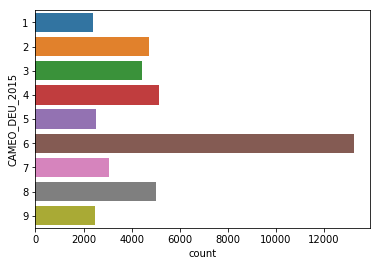

In [10]:
sns.countplot(y='CAMEO_DEU_2015',data=mailout_train)

In [11]:
# set LNR as index for train/test data
mailout_train.index = mailout_train['LNR']
mailout_test.index = mailout_test['LNR']

In [12]:
# convert the "CAMEO_DEUG_2015" column data type from object to numeric
mailout_train["CAMEO_DEUG_2015"] = pd.to_numeric(mailout_train.CAMEO_DEUG_2015, errors='coerce')
mailout_test["CAMEO_DEUG_2015"] = pd.to_numeric(mailout_test.CAMEO_DEUG_2015, errors='coerce')
print(mailout_train["CAMEO_DEUG_2015"].dtypes)
print(mailout_test["CAMEO_DEUG_2015"].dtypes)

float64
float64


## Convert all missing/unknown value into -1

Raw data was organized poorly. In some columns, -1 and 0 are all stand for unknown/missing data. In other columns 0 or 9 is stand for unknown/missing data.<br>
This section includes three parts:
1. covert all unknown/missing value into -1, make sure only -1 stands for missing value
2. Select only useful columns from raw data. Delete redundant and unrelated columns.
3. Drop out the columns with a high missing rate.
4. Use average value to replace the misssing value.

### Convert missing value into negtive one

In [13]:
# This function is designed to change missing value into -1.
def replace_val(df,target_columns,target_val,new_val): 
    '''Reads in a dataframe file and change the target_val of target_columns to new_val. 
       :param df: dataframe to deal with
       :param target_columns: the columns need to edit
       :param target_val: the specific val from the target_columns that need to be changed
       :param new_val: the value you want after edit.
       :return: The new dataframe after value edit'''    
    
    converted_df = df[target_columns].replace(target_val,new_val)
    df = df.drop(target_columns, axis=1)
    prepared_df = pd.concat([df,converted_df],axis=1)
    
    return prepared_df

In [14]:
# Raw data considered 0/9/-1 as unknown value. To make the definition consistant, I find out the lists below.
# According to these lists, we can convert some 0/9 to make sure only -1 stands for unknown value. 
zero_to_neg_one = ["ALTERSKATEGORIE_GROB","ALTER_HH","ANREDE_KZ","CJT_GESAMTTYP","GEBAEUDETYP","HH_EINKOMMEN_SCORE","KBA05_BAUMAX","KBA05_GBZ","KKK","NATIONALITAET_KZ","PRAEGENDE_JUGENDJAHRE","REGIOTYP","RETOURTYP_BK_S","TITEL_KZ","WOHNDAUER_2008","W_KEIT_KIND_HH"]
nine_to_neg_one = ["KBA05_ALTER1","KBA05_ALTER2","KBA05_ALTER3","KBA05_ALTER4","KBA05_ANHANG","KBA05_AUTOQUOT","KBA05_CCM1","KBA05_CCM2","KBA05_CCM3","KBA05_CCM4","KBA05_DIESEL","KBA05_FRAU","KBA05_HERST1","KBA05_HERST2","KBA05_HERST3","KBA05_HERST4","KBA05_HERST5","KBA05_HERSTTEMP","KBA05_KRSAQUOT","KBA05_KRSHERST1","KBA05_KRSHERST2","KBA05_KRSHERST3","KBA05_KRSKLEIN","KBA05_KRSOBER","KBA05_KRSVAN","KBA05_KRSZUL","KBA05_KW1","KBA05_KW2","KBA05_KW3","KBA05_MAXAH","KBA05_MAXBJ","KBA05_MAXHERST","KBA05_MAXSEG","KBA05_MAXVORB","KBA05_MOD1","KBA05_MOD2","KBA05_MOD3","KBA05_MOD4","KBA05_MOD8","KBA05_MODTEMP","KBA05_MOTOR","KBA05_MOTRAD","KBA05_SEG1","KBA05_SEG10","KBA05_SEG2","KBA05_SEG3","KBA05_SEG4","KBA05_SEG5","KBA05_SEG6","KBA05_SEG7","KBA05_SEG8","KBA05_SEG9","KBA05_VORB0","KBA05_VORB1","KBA05_VORB2","KBA05_ZUL1","KBA05_ZUL2","KBA05_ZUL3","KBA05_ZUL4","RELAT_AB","SEMIO_DOM","SEMIO_ERL","SEMIO_FAM","SEMIO_KAEM","SEMIO_KRIT","SEMIO_KULT","SEMIO_LUST","SEMIO_MAT","SEMIO_PFLICHT","SEMIO_RAT","SEMIO_REL","SEMIO_SOZ","SEMIO_TRADV","SEMIO_VERT","ZABEOTYP"]

In [15]:
# This function called the replace_val function to realize the change of missing value.
def convert_unknown_to_negone(df,zero_to_neg_one,nine_to_neg_one):
    df = replace_val(df,zero_to_neg_one,0,-1)
    df = replace_val(df,nine_to_neg_one,9,-1)
    df = df.fillna(value=-1)
    return df

In [16]:
train_df = convert_unknown_to_negone(mailout_train,zero_to_neg_one,nine_to_neg_one)
test_df = convert_unknown_to_negone(mailout_test,zero_to_neg_one,nine_to_neg_one)

In [17]:
RESPONSE = train_df['RESPONSE']

### Column Selection

I choosed 114 meaningful columns from the raw data(360plus columns) based on the provided meta data information.

In [18]:
col_list = ['ANREDE_KZ', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SHOPPER_TYP', 'VERS_TYP', 'ZABEOTYP', 'ALTER_HH', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24', 'D19_GESAMT_ONLINE_DATUM', 'D19_GESAMT_DATUM', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_DATUM', 'D19_TELKO_ONLINE_DATUM', 'D19_TELKO_DATUM', 'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_DATUM', 'D19_VERSI_ONLINE_DATUM', 'D19_VERSI_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12', 'W_KEIT_KIND_HH', 'ANZ_HH_TITEL', 'KONSUMNAEHE', 'WOHNLAGE', 'CAMEO_DEUG_2015', 'KBA05_AUTOQUOT', 'KBA05_KRSOBER', 'KBA05_MAXAH', 'KBA05_MAXBJ', 'KBA05_MOTRAD', 'KBA05_SEG9', 'WOHNDAUER_2008', 'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL', 'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH', 'D19_BEKLEIDUNG_REST', 'D19_BIO_OEKO', 'D19_BILDUNG', 'D19_BUCH_CD', 'D19_DIGIT_SERV', 'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT', 'D19_GARTEN', 'D19_HANDWERK', 'D19_HAUS_DEKO', 'D19_KINDERARTIKEL', 'D19_KOSMETIK', 'D19_LEBENSMITTEL', 'D19_NAHRUNGSERGAENZUNG', 'D19_RATGEBER', 'D19_REISEN', 'D19_SAMMELARTIKEL', 'D19_SCHUHE', 'D19_SONSTIGE', 'D19_TECHNIK', 'D19_TELKO_MOBILE', 'D19_TELKO_REST', 'D19_TIERARTIKEL', 'D19_VERSICHERUNGEN', 'D19_VOLLSORTIMENT', 'D19_WEIN_FEINKOST', 'BALLRAUM', 'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_AUTOQUOTE', 'KBA13_HALTER_20', 'KBA13_HALTER_25', 'KBA13_HALTER_30', 'KBA13_HALTER_35', 'KBA13_HALTER_40', 'KBA13_HALTER_45', 'KBA13_HALTER_50', 'KBA13_HALTER_55', 'KBA13_HALTER_60', 'KBA13_HALTER_65', 'KBA13_HALTER_66', 'PLZ8_BAUMAX', 'PLZ8_HHZ', 'PLZ8_GBZ', 'ARBEIT', 'ORTSGR_KLS9']

In [19]:
train_df = train_df[col_list]
test_df = test_df[col_list]

In [20]:
train_df.shape

(42962, 114)

### Drop out the columns with a high missing rate

In [21]:
# This function drop those columns that has a high missing value rate from the specified table.
# table: the specified table 
# threshold: the columns which have a higher missing rate than this threshold will be drop
# function return is the remianing column list that has low missing value rate.

def drop_missing_val_column(table, threshold):
    missing_rate = []
    for column in table.columns:
        rate = table[table[column]==-1].shape[0]/len(table)*100
        missing_rate.append(rate)
    
    column_remain = []
    column_name = table.columns
    for i in range(0,table.shape[1]):
        if missing_rate[i]<=threshold:
            column_remain.append(column_name[i])
    
    return column_remain

In [22]:
column_remain=drop_missing_val_column(train_df,25)
print(len(column_remain))

113


### Use average value to replace the misssing value

In [23]:
# The Data_process function changed all missing/unknown value(-1) to the mean value of each column.
import helper

def Data_process(df,column_remain):
    df_remain = df[column_remain]
    df_new = helper.replace_unknown_to_mean(df_remain)
    return df_new
    

In [24]:
# checked already changed all -1 to the mean value for all columns.
train_df = Data_process(train_df,column_remain)
train_df.shape

/home/workspace/helper.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column] = df[column].replace(-1,mean[i])
/home/workspace/helper.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column] = df[column].replace(-1,mean[i])
/home/workspace/helper.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[

(42962, 113)

In [25]:
test_df = Data_process(test_df,column_remain)
test_df.shape

/home/workspace/helper.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column] = df[column].replace(-1,mean[i])
/home/workspace/helper.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column] = df[column].replace(-1,mean[i])
/home/workspace/helper.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[

(42833, 113)

In [26]:
train_df['Flag']=1
test_df['Flag']=0

Segmentation_df = pd.concat([train_df,test_df],join = 'inner')
Segmentation_df.shape

(85795, 114)

In [27]:
Segmentation_df.head()

,ANREDE_KZ,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_FAMILIE_FEIN,LP_STATUS_FEIN,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,...,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,Flag
LNR,,,,,,,,,,,,,,,,,,,,,
1763,2,2.0,6,8.0,0,2.0,1.0,3.0,1.0,1.0,...,1.0,1.0,4.0,4.0,5.0,3.0,2.0,3.0,7.0,1
1771,2,2.0,6,8.0,0,2.0,2.0,9.0,2.0,8.0,...,4.0,3.0,3.0,3.0,1.0,3.0,4.0,2.0,2.0,1
1776,1,4.0,5,3.0,1,1.0,0.0,10.0,1.0,2.0,...,1.0,1.0,2.0,3.0,1.0,3.0,4.0,4.0,8.0,1
1460,2,2.0,5,5.0,1,2.0,2.0,3.0,1.0,2.0,...,1.0,2.0,5.0,5.0,1.0,3.0,4.0,4.0,9.0,1
1783,1,6.0,5,4.0,0,3.0,1.0,6.0,1.0,3.0,...,3.0,2.0,3.0,4.0,4.0,2.0,1.0,3.0,7.0,1


## Normalize the data
We need to standardize the scale of the numerical columns in order to consistently compare the values of different features. We can use a MinMaxScaler to transform the numerical values so that they all fall between 0 and 1. This is a necessary step before using PCA.


In [28]:
# scale numerical features into a normalized range, 0-1
# reference to the following website: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

Segmentation_scaled=pd.DataFrame(scaler.fit_transform(Segmentation_df.astype(float)))
Segmentation_scaled.columns=Segmentation_df.columns
Segmentation_scaled.index=Segmentation_df.index

Segmentation_scaled.head()

,ANREDE_KZ,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_FAMILIE_FEIN,LP_STATUS_FEIN,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,...,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,Flag
LNR,,,,,,,,,,,,,,,,,,,,,
1763,1.0,0.2,1.0,0.636364,0.0,0.5,0.090909,0.222222,0.0,0.000000,...,0.00,0.00,0.75,0.75,1.00,0.50,0.25,0.250,0.777778,1.0
1771,1.0,0.2,1.0,0.636364,0.0,0.5,0.181818,0.888889,0.5,0.500000,...,0.75,0.50,0.50,0.50,0.00,0.50,0.75,0.125,0.222222,1.0
1776,0.0,0.6,0.8,0.181818,1.0,0.0,0.000000,1.000000,0.0,0.071429,...,0.00,0.00,0.25,0.50,0.00,0.50,0.75,0.375,0.888889,1.0
1460,1.0,0.2,0.8,0.363636,1.0,0.5,0.181818,0.222222,0.0,0.071429,...,0.00,0.25,1.00,1.00,0.00,0.50,0.75,0.375,1.000000,1.0
1783,0.0,1.0,0.8,0.272727,0.0,1.0,0.090909,0.555556,0.0,0.142857,...,0.50,0.25,0.50,0.75,0.75,0.25,0.00,0.250,0.777778,1.0


In [29]:
train_clean = Segmentation_scaled[Segmentation_scaled['Flag']==1]
train_clean = train_clean.drop(['Flag'], axis=1)
print(train_clean.shape)

(42962, 113)


In [30]:
test_clean = Segmentation_scaled[Segmentation_scaled['Flag']==0]
test_clean = test_clean.drop(['Flag'], axis=1)
print(test_clean.shape)

(42833, 113)


In [31]:
train_clean.head()

,ANREDE_KZ,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_FAMILIE_FEIN,LP_STATUS_FEIN,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,...,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9
LNR,,,,,,,,,,,,,,,,,,,,,
1763,1.0,0.2,1.0,0.636364,0.0,0.5,0.090909,0.222222,0.0,0.000000,...,0.25,0.00,0.00,0.75,0.75,1.00,0.50,0.25,0.250,0.777778
1771,1.0,0.2,1.0,0.636364,0.0,0.5,0.181818,0.888889,0.5,0.500000,...,0.75,0.75,0.50,0.50,0.50,0.00,0.50,0.75,0.125,0.222222
1776,0.0,0.6,0.8,0.181818,1.0,0.0,0.000000,1.000000,0.0,0.071429,...,0.25,0.00,0.00,0.25,0.50,0.00,0.50,0.75,0.375,0.888889
1460,1.0,0.2,0.8,0.363636,1.0,0.5,0.181818,0.222222,0.0,0.071429,...,0.00,0.00,0.25,1.00,1.00,0.00,0.50,0.75,0.375,1.000000
1783,0.0,1.0,0.8,0.272727,0.0,1.0,0.090909,0.555556,0.0,0.142857,...,0.25,0.50,0.25,0.50,0.75,0.75,0.25,0.00,0.250,0.777778


### PCA

You can use PCA to reduce the dimension of our data. One of the important parater for PCA process is n_components. I choosed 50. From the explanied_var function we can see that, 85% variance of the data has been captured by our PCA process with the n_components=50.

In [32]:
import numpy as np
from sklearn.decomposition import PCA
train_X = train_clean.values
test_X = test_clean.values
pca = PCA(n_components=50)
pca.fit(train_X)

PCA(n_components=50)

In [33]:
var_np = pca.explained_variance_ratio_

In [34]:
def explanined_var(np,n_componets):
    i = 0
    explained_var = 0
    while i<n_componets:
        explained_var = explained_var + np[i]
        i = i + 1
    return explained_var

In [35]:
explanined_variance = explanined_var(var_np,50)
print(explanined_variance)

0.8521101626344687


In [36]:
train_pca = pca.transform(train_X)
train_pca.shape

(42962, 50)

In [37]:
test_pca = pca.transform(test_X)
test_pca.shape

(42833, 50)

In [38]:
train_pca_df = pd.DataFrame(train_pca, index=mailout_train.index)
test_pca_df = pd.DataFrame(test_pca, index=mailout_test.index)

### SMOTE to deal with imbalanced data

In [39]:
# check version number
import imblearn
print(imblearn.__version__)

0.7.0


In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.pipeline import Pipeline

# introduce SMOTE to over sampleing for positive records
over_sample = SMOTE(sampling_strategy=0.0189)
# introduce RandomUnderSampler to under sampleing for negative records
under_sample = RandomUnderSampler(sampling_strategy=0.0189)

# refered to the example from following website for the use of pipeline
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
steps = [('over', over_sample), ('under', under_sample)]
new_pipeline = Pipeline(steps=steps)

count = Counter(RESPONSE)
print(count)

# transform the dataset to solve the imbalance problem.
X, y = new_pipeline.fit_resample(train_pca_df.values, RESPONSE)

count = Counter(y)
print(count)

Counter({0: 42430, 1: 532})
Counter({0: 42380, 1: 801})


In [41]:
train_pca_df = pd.DataFrame(X)

### Train/test split

In [42]:
train_YX_pca = pd.concat([y,train_pca_df],axis=1)
print(train_YX_pca.shape)

(43181, 51)


In [43]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_YX_pca, test_size=0.3,random_state=42)

### Store Data into Data_SMOTE folder

In [44]:
train.to_csv('Data_SMOTE/train.csv',index=False,header=False)
test.to_csv('Data_SMOTE/test.csv',index=False,header=False)
test_pca_df.to_csv('Data_SMOTE/predict.csv',header=False)

## Create SVM Model

### Load Data

In [45]:
data_dir = 'Data_SMOTE'

In [46]:
import os
# import libraries here
import numpy as np
import pandas as pd
# read in train data, assuming it is stored locally
train_data = pd.read_csv(os.path.join(data_dir, "train.csv"), header=None, names=None)

# labels are in the first column
train_y = train_data.iloc[:,0]
train_x = train_data.iloc[:,1:]

In [47]:
# read in test data, assuming it is stored locally
test_data = pd.read_csv(os.path.join(data_dir, "test.csv"), header=None, names=None)

# labels are in the first column
test_y = test_data.iloc[:,0]
test_x = test_data.iloc[:,1:]

### Training the data with SVM

In [48]:
from sklearn import svm
# used linear kernel for computation
linear_svc = svm.SVC(C=0.95,kernel='rbf',class_weight={1:10},probability=True,random_state=10)
# predict result on training data example
linear_svc.fit(train_x, train_y)

SVC(C=0.95, class_weight={1: 10}, probability=True, random_state=10)

### Predict for test dataset

In [49]:
test_y_preds = linear_svc.predict_proba(test_x)
test_y_preds = test_y_preds[:,1]

### Model evaluate with AUC

In [50]:
# the use of metrics.auc is learned from the following website
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
from sklearn import metrics

y = np.array(test_y)
pred = test_y_preds
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('Test set AUC score is {}'.format(AUC))

Test set AUC score is 0.7181138880835831


In [51]:
y_train = np.array(train_y)
train_y_preds = linear_svc.predict_proba(train_x)
pred_train = train_y_preds[:,1]
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, pred_train, pos_label=1)
AUC_train = metrics.auc(fpr_train, tpr_train)
print('Train set AUC score is {}'.format(AUC_train))

Train set AUC score is 0.9706851737532131


## Predict for target data

In [52]:
predict_df = pd.read_csv('Data_SMOTE/predict.csv',header=None)

In [53]:
predict_df.index = predict_df[0]
predict_df= predict_df.drop([0], axis=1)
predict_df.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
1754,1.046932,-0.167340,0.761826,-0.103578,0.346206,-1.281209,0.515282,0.336928,0.338394,0.615491,...,-0.086024,0.402254,0.244533,0.081416,-0.216871,-0.414989,0.113900,0.381947,-0.028806,-0.023818
1770,-0.277139,0.116409,0.951868,-0.724292,-0.750933,0.108989,0.397972,-0.242764,0.188021,-0.058632,...,-0.089473,0.255259,0.041657,-0.009893,-0.129958,-0.128808,-0.015429,0.118338,-0.072280,-0.173001
1465,0.001791,0.774682,-0.109719,-0.995250,0.876818,0.405664,0.338872,0.347387,-0.560155,-0.220635,...,0.110478,-0.148303,0.443428,0.198356,0.022437,0.160575,-0.127440,-0.074332,0.176408,0.039616
1470,-0.765985,0.742860,-0.477015,-0.255093,0.421052,-0.223492,-0.439053,-0.664538,-0.436533,0.307775,...,0.546787,0.063493,-0.125849,-0.633690,-0.048328,0.078548,0.294151,0.135833,0.315969,0.186323
1478,2.735283,0.053024,-1.167207,0.292475,-1.021456,0.584973,0.455686,0.505549,-0.295922,-0.026379,...,-0.708921,-0.006718,0.113382,0.004285,0.021545,-0.706669,-0.323299,-0.241957,-0.026812,0.046289


In [54]:
# predict results for the given test data using our trained SVM model.
predict_y_preds = linear_svc.predict_proba(predict_df)

In [55]:
from pandas import Series
result_df = pd.DataFrame(predict_df.index.values,columns=['LNR'])
result_df['RESPONSE'] = predict_y_preds[:,1]

In [56]:
# generate the prepared predicting report.
result_df.to_csv('Data_SMOTE/predict_results.csv',index=False)